<a href="https://colab.research.google.com/github/sidchaubey/Pratice_Python/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
from pylab import rcParams
import pmdarima
from statsmodels.tsa.statespace import sarimax
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
dataset = sns.load_dataset("flights")
dataset.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
dataset.shape

(144, 3)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [7]:
dataset.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [11]:
dataset.isna().any(axis=1).sum()

0

In [12]:
dataset.isna().sum()

year          0
month         0
passengers    0
dtype: int64

In [13]:
dataset.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [14]:
dataset.values

array([[1949, 'Jan', 112],
       [1949, 'Feb', 118],
       [1949, 'Mar', 132],
       [1949, 'Apr', 129],
       [1949, 'May', 121],
       [1949, 'Jun', 135],
       [1949, 'Jul', 148],
       [1949, 'Aug', 148],
       [1949, 'Sep', 136],
       [1949, 'Oct', 119],
       [1949, 'Nov', 104],
       [1949, 'Dec', 118],
       [1950, 'Jan', 115],
       [1950, 'Feb', 126],
       [1950, 'Mar', 141],
       [1950, 'Apr', 135],
       [1950, 'May', 125],
       [1950, 'Jun', 149],
       [1950, 'Jul', 170],
       [1950, 'Aug', 170],
       [1950, 'Sep', 158],
       [1950, 'Oct', 133],
       [1950, 'Nov', 114],
       [1950, 'Dec', 140],
       [1951, 'Jan', 145],
       [1951, 'Feb', 150],
       [1951, 'Mar', 178],
       [1951, 'Apr', 163],
       [1951, 'May', 172],
       [1951, 'Jun', 178],
       [1951, 'Jul', 199],
       [1951, 'Aug', 199],
       [1951, 'Sep', 184],
       [1951, 'Oct', 162],
       [1951, 'Nov', 146],
       [1951, 'Dec', 166],
       [1952, 'Jan', 171],
 

In [21]:
dataset[["year"]].value_counts()

year
1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
dtype: int64

In [23]:
dataset[["year"]].value_counts().sum()

144

In [24]:
dataset.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [46]:
dataset["day"] = "1"

In [53]:
dataset

,year,month,passengers,day,combined
0,1949,Jan,112,1,Jan 1 1949
1,1949,Feb,118,1,Feb 1 1949
2,1949,Mar,132,1,Mar 1 1949
3,1949,Apr,129,1,Apr 1 1949
4,1949,May,121,1,May 1 1949
...,...,...,...,...,...
139,1960,Aug,606,1,Aug 1 1960
140,1960,Sep,508,1,Sep 1 1960
141,1960,Oct,461,1,Oct 1 1960
142,1960,Nov,390,1,Nov 1 1960


In [51]:
dataset["combined"] = dataset[["month", "day", "year"]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

In [135]:
dataset.head()



,year,month,passengers,day,combined
0,1949,Jan,112,1,1949-01-01
1,1949,Feb,118,1,1949-02-01
2,1949,Mar,132,1,1949-03-01
3,1949,Apr,129,1,1949-04-01
4,1949,May,121,1,1949-05-01


In [136]:
dataset["combined"] = dataset["combined"].apply(lambda x: (datetime.datetime.strptime(x, '%b %d %Y')))
dataset.head()

TypeError: ignored

In [127]:
# ts_log = dataset.set_index('Date')


# dataset["combined"] = pd.DatetimeIndex(dataset["combined"].values,
#                                freq=dataset["combined"].inferred_freq)

In [137]:
df = dataset.groupby("combined")["passengers"].sum()
df.head()

combined
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: passengers, dtype: int64

The reason for inferred frequency to eliminate the warning while training SARIMA(
  /usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  /# - Attemtping to index with a type that cannot be cast to integer
)

https://stackoverflow.com/questions/49547245/valuewarning-no-frequency-information-was-provided-so-inferred-frequency-ms-wi

In [138]:
# df = df.asfreq('D')

In [139]:
type(df)

pandas.core.series.Series

In [140]:
df.shape

(144,)

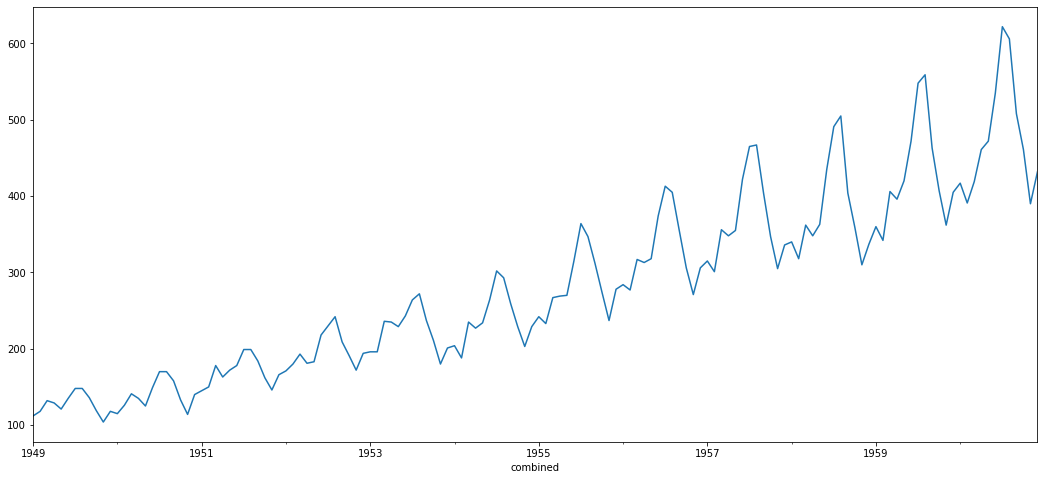

In [141]:
df.plot();


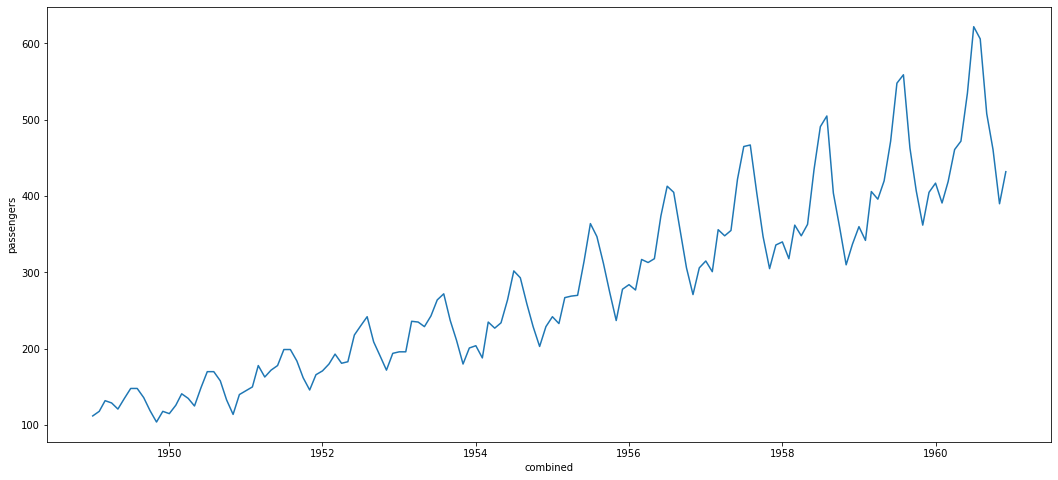

In [142]:

sns.lineplot(data=df);

In [143]:
split_num = 100

X_train = df.iloc[:100]
X_test = df.iloc[100:]

print(X_train.shape, X_test.shape)

(100,) (44,)


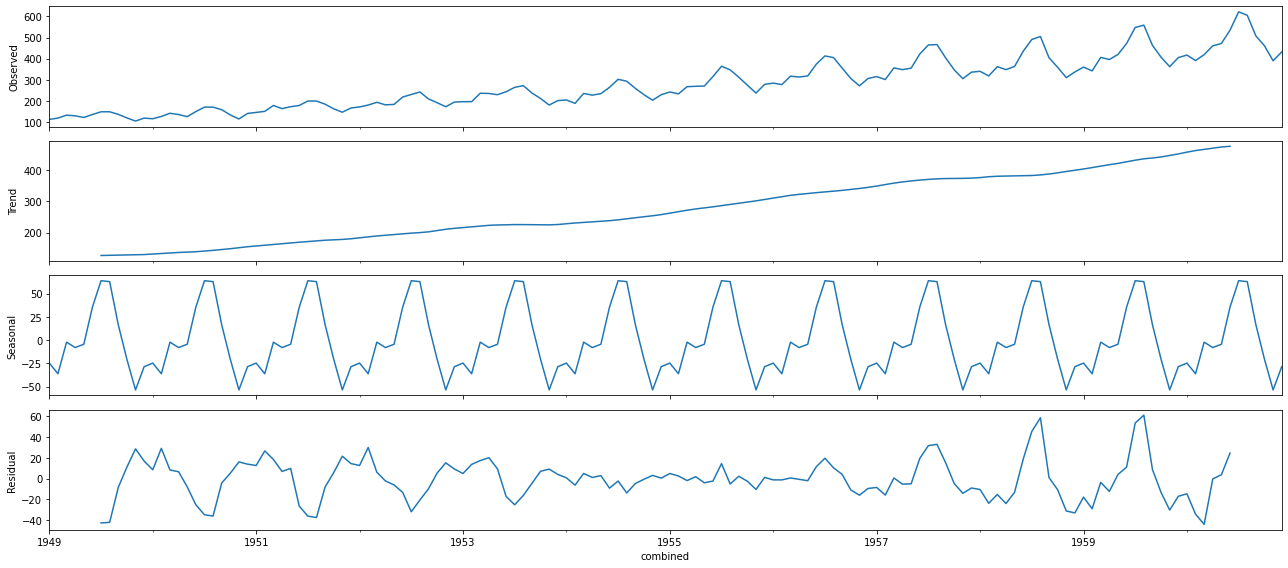

In [144]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()


In [145]:
model = pmdarima.auto_arima(X_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5,  # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=919.019, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1373.846, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=914.492, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=916.371, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=916.324, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=915.159, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=912.375, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=915.850, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=918.705, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=913.987, Time=0.27 sec
 

In [152]:
X_train.index = pd.DatetimeIndex(X_train.index.values,
                               freq=X_train.index.inferred_freq)

In [153]:
model = sarimax.SARIMAX(X_train, order=(2, 0, 1), seasonal_order=(0,0,0,0))

results = model.fit(display=True, start_params=[0, 0, 0, 1]);

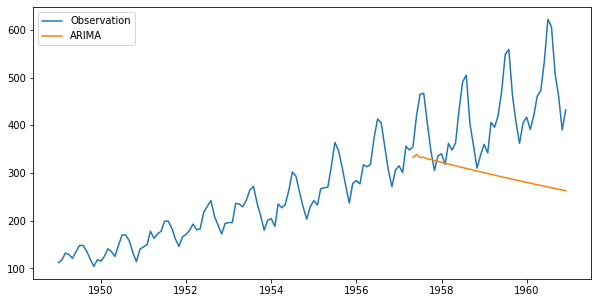

In [154]:
sarimax_prediction = results.predict(
    start=X_test.index[0], end=X_test.index[-1], dynamic=False)
plt.figure(figsize=(10, 5))
l1, = plt.plot(df, label='Observation')
l2, = plt.plot(sarimax_prediction, label='ARIMA')
plt.legend(handles=[l1, l2])
plt.savefig('SARIMAX prediction', bbox_inches='tight', transparent=False)

In [157]:
print('SARIMAX MAE = ', mean_absolute_error(sarimax_prediction, X_test))

SARIMAX MAE =  123.44316133396136


In [158]:
model = pmdarima.auto_arima(X_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3,  # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=919.019, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1373.846, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=914.492, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=916.371, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=916.324, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=915.159, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=912.375, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=915.850, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=918.705, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=913.987, Time=0.26 sec
 